In [1]:
import pandas as pd

In [3]:
from google.colab import files 
files.upload()

Saving weather_data(V_5).csv to weather_data(V_5).csv


{'weather_data(V_5).csv': b'day,temperature,windspeed,event\r\n1/1/2017,32,6,Rain\r\n1/4/2017,,7,Sunny\r\n1/5/2017,28,,Snow\r\n1/6/2017,,7,\r\n1/7/2017,32,,Rain\r\n1/8/2017,31,2,Sunny\r\n1/9/2017,,,\r\n1/10/2017,34,8,Cloudy\r\n1/11/2017,40,12,Sunny\r\n'}

In [17]:
#Handling Missing Data - fillna, interpolate, dropna
df = pd.read_csv("weather_data(V_5).csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,7.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [6]:
import pandas as pd
df = pd.read_csv("weather_data(V_5).csv", parse_dates=["day"])
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,31.0,2.0,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [18]:
#fillna
new_df = df.fillna(0)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,7.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,0
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,0.0,0.0,0
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [19]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'No Event'
    })
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,7.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,No Event
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,0.0,0.0,No Event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [20]:
#**Use method to determine how to fill na values**
new_df = df.fillna(method="ffill")
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,32.0,7.0,Sunny
2,1/5/2017,28.0,7.0,Snow
3,1/6/2017,28.0,7.0,Snow
4,1/7/2017,32.0,7.0,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,31.0,2.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [10]:
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,7.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,2.0,Rain
2017-01-08,31.0,2.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [21]:
#**Use of axis**
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/4/2017,7,7,Sunny
2,1/5/2017,28,Snow,Snow
3,1/6/2017,7,7,NaN
4,1/7/2017,32,Rain,Rain
5,1/8/2017,31,2,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34,8,Cloudy
8,1/11/2017,40,12,Sunny


In [22]:
#**limit parameter**
new_df = df.fillna(method="ffill",limit=1)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,32.0,7.0,Sunny
2,1/5/2017,28.0,7.0,Snow
3,1/6/2017,28.0,7.0,Snow
4,1/7/2017,32.0,7.0,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,31.0,2.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [23]:
#interpolate
new_df = df.interpolate()
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,30.0,7.0,Sunny
2,1/5/2017,28.0,7.0,Snow
3,1/6/2017,30.0,7.0,NaN
4,1/7/2017,32.0,4.5,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,32.5,5.0,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [31]:
#dropna
new_df = df.dropna()
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
5,1/8/2017,31.0,2.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [32]:
new_df = df.dropna(how='all')
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,7.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [33]:
new_df = df.dropna(thresh=1)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,7.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,31.0,2.0,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [14]:
new_df = df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-08,31.0,2.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [15]:
#Inserting Missing Dates
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df = df.reindex(idx)
df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,31.0,2.0,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


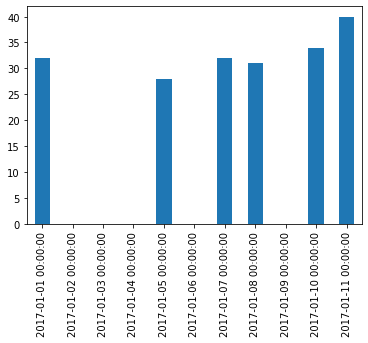

In [16]:
%matplotlib inline
df.temperature.plot.bar()